## <font color = 'green' id = "section" > Projet_7: Implémenter un modèle de scoring</font>

### <font color = 'green' id = "section" > Notebook 1: Dossier Code: Prétraitement et nettoyage

# <font color="blue">Sommaire</font>
1. [Importation des librairies](#section_1)    
2. [Lecture du Dataset](#section_2)     
3. [Aperçu des données](#section_3)         
4. [Affichages des informations du Dataset](#section_4)        
5. [Preparation des données train et test](#section_5)  
    5.1 [Valeurs abérrantes/atypiques](#section_5_1)   
    5.2 [Distribution](#section_5_2)   
    5.3 [Valeurs uniques](#section_5_3)   
    5.4 [Traitement valeurs manquantes](#section_5_4)    
6. [Breve analyse exploratoire](#section_6)    
    6.1 [Répartition par genre des clients](#section_6_1)   
    6.2 [Répartition des revenus par personne en fontion du genre](#section_6_2)   
    6.3 [Répartition des clients susceptible d'être en faillite en fonction de leur situation familiale ](#section_6_3)   
    6.4 [Répartition des clients susceptible d'être en faillite en fonction  du nombre d'enfants](#section_6_4)  
7. [Augmentation des données](#section_7) 
8. [Liaison entre les variables](#section_8)   
9. [Enregistrement de fichier](#section_9)  

# <font color ='red' id = 'section_1' > 1.Importation des librairies </font>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import ast
import scipy as sp

#-------------------------------------------------------------------
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#-----------------------------------------------------------------
from tqdm import tqdm
import gc
from collections import Counter
from imblearn.over_sampling import SMOTE    
    
#------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Checklist
# Mission:

1. Construire un **modèle de scoring** qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.


2. Construire un **dashboard interactif** à destination des gestionnaires de la relation client permettant **d'interpréter les prédictions** faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.


# Objectifs/ Spécifications du dashboard:

**1**. Permettre de **visualiser le score et l’interprétation de ce score** pour chaque client de façon intelligible pour une personne non experte en data science.

**2.** Permettre de **visualiser des informations descriptives** relatives à un client (via un système de filtre).


**3.** Permettre de **comparer les informations descriptives** relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.


# Objectifs/ Dossier:

Un dossier sur un outil de versioning de code doit contenir:


* Le **code de la modélisation** (du prétraitement à la prédiction)


* Le **code générant le dashboard**


* Le **code** permettant de **déployer le modèle sous forme d'API**.


# Objectifs/ note méthodologique :

Une note méthodologique décrivant :

* La méthodologie **d'entraînement du modèle** (2 pages maximum)


* La **fonction coût** métier, **l'algorithme d'optimisation** et la **métrique d'évaluation** (1 page maximum)


* **L’interprétabilité globale** et **locale** du modèle (1 page maximum)


* Les **limites** et les **améliorations possibles** (1 page maximum)


# Informations supplémentaires

* Sélectionner un kernel Kaggle pour nous faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring.

* Analyser ce kernel et l’adapter pour nous assurer qu’il répond aux besoins de notre mission.


On peut  ainsi nous  focaliser sur:


* **L’élaboration du modèle**, 


* Son **optimisation**,


* Sa **compréhension**.

# Description des données

lien vers les données: https://www.kaggle.com/c/home-credit-default-risk/data

![title](home_credit.png)

# <font color="red" id="section_2"> 2. Chargement, lecture  et apercu  des données</font>

In [4]:
path = r"C:\Users\sylla\Desktop\Data Sciences\Projet7_ impémenter un model scoring\archive/"

### <font color="red" id="section_2_1"> 2.1 Data train </font>
**application_{train|test}.csv**

* Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).

* Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

* **1** signifie faillite et **0** non .

In [5]:
train= pd.read_csv(path + "application_train.csv")

In [6]:
train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### <font color="red" id="section_2_2"> 2.2 Data test </font>

In [7]:
Test= pd.read_csv(path + "application_test.csv")

In [8]:
Test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


### <font color="red" id="section_2_3"> 2.3 Data bureau</font>
**bureau.csv**

* Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).

* Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

In [9]:
df_bureau= pd.read_csv(path + "bureau.csv")

In [10]:
df_bureau.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


In [11]:
df_bureau.shape

(1716428, 17)

### <font color="red" id="section_2_4"> 2.4 Bueau balance </font>
**bureau_balance.csv**

* Soldes mensuels des crédits antérieurs au bureau de crédit.

* Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit.

In [12]:
df_bureau_balance= pd.read_csv(path + "bureau_balance.csv")

In [13]:
df_bureau_balance.head(2)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C


In [14]:
df_bureau_balance.shape

(27299925, 3)

### <font color="red" id="section_2_5"> 2.5 Data credit_card_balance </font>

**credit_card_balance.csv**

* Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.

* Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon.

In [15]:
df_credit_card_balc= pd.read_csv(path + "credit_card_balance.csv")

In [16]:
df_credit_card_balc.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.00,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.08,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0


In [17]:
df_credit_card_balc.shape

(3840312, 23)

### <font color="red" id="section_2_6"> 2.6 Data HomeCredit_columns_description </font>
**HomeCredit_columns_description.csv**

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [18]:
df_Hdit__des = pd.read_csv(path + "HomeCredit_columns_description.csv", encoding='unicode_escape' )

In [19]:
df_Hdit__des.head(2)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN


In [20]:
df_Hdit__des.shape

(219, 5)

### <font color="red" id="section_2_7"> 2.7 Data installments_payments </font>

**installments_payments.csv**

* Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.

Il y a

* a) une ligne pour chaque paiement effectué puis

* b) une ligne pour chaque paiement manqué.

* Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

In [21]:
df_ins_pay= pd.read_csv(path + "installments_payments.csv")

In [22]:
df_ins_pay.head(2)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525


In [23]:
df_ins_pay.shape

(13605401, 8)

###  <font color="red" id="section_2_8"> 2.8 Data POS_CASH_balance  </font>
**POS_CASH_balance.csv**

* Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.

* Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon.

In [24]:
df_POS_CASH_bal= pd.read_csv(path + "POS_CASH_balance.csv")

In [25]:
df_POS_CASH_bal.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


In [26]:
df_POS_CASH_bal.shape

(10001358, 8)

### <font color="red" id="section_2_9"> 2.9 Data previous_application  </font>
**previous_application.csv**

* Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.

* Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [27]:
df_prev_app= pd.read_csv(path + "previous_application.csv")

In [28]:
df_prev_app.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [29]:
df_prev_app.shape

(1670214, 37)

### <font color="red" id="section_2_10"> 2.10 Data sample_submission  </font>

In [30]:
df_sample_sub= pd.read_csv(path + "sample_submission.csv")

In [31]:
df_sample_sub.head(2)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5


In [32]:
df_sample_sub.shape

(48744, 2)

# <font color="red" id="section_4"> 4. Information sur les datasets</font>

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [34]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


### <font color="red" id="section_4_1"> 4.1 Valeurs manquantes

### Train dataset

In [35]:
df_nan = pd.DataFrame(train.isna().sum().sort_values(ascending = False))
df_nan.columns =['Nombre de NAN']
df_nan

,Nombre de NAN
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


### Test dataset

In [36]:
df_nan = pd.DataFrame(Test.isna().sum().sort_values(ascending = False))
df_nan.columns =['Nombre de NAN']
df_nan

,Nombre de NAN
COMMONAREA_AVG,33495
COMMONAREA_MODE,33495
COMMONAREA_MEDI,33495
NONLIVINGAPARTMENTS_AVG,33347
NONLIVINGAPARTMENTS_MODE,33347
NONLIVINGAPARTMENTS_MEDI,33347
FONDKAPREMONT_MODE,32797
LIVINGAPARTMENTS_AVG,32780
LIVINGAPARTMENTS_MODE,32780
LIVINGAPARTMENTS_MEDI,32780


### <font color="red" id="section_4_1"> 4.2 Duplication

In [37]:
train.duplicated().sum()

0

## <font color="red" id="section_5"> 5. Preparation des données train et test

**Les étapes qui suiront sont issues de la plupart des cas du kernel Kaggle selctionné.**

## <font color = 'red' >  Etape 1: Fusion des fichiers train et test  et nettoyage

In [38]:
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv(path + 'application_train.csv', nrows= num_rows)
    #df =data_train_selct
    test_df = pd.read_csv(path + 'application_test.csv', nrows= num_rows)
    #test_df = data_test_selct
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    gc.collect()
    return df

In [39]:
df = application_train_test(num_rows = None, nan_as_category = False)

Train samples: 307511, test samples: 48744


In [40]:
df.head(4)

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [41]:
df.shape

(356255, 123)

### Note :

**EXT_SOURCE_ ?** : Score normalisé à partir d'une source de données externe

**TARGET** :  C'est la variable que nous allons prédire
* La variable prend soit la valeur **0** quand le prêt a été remboursé sans soucis,
* soit la valeur **1** quand il y a eu un défaut de payement.

**AMT_ANNUITY**: Somme d'argent qu'une personne est tenue de donner périodiquement à une autre : rente

**Nous allons sélectionner quelques variables qui rentre en compte concernant les critères d'attribution d'un prêt ou pas.**

In [42]:
df_slect = df[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER",'FLAG_OWN_CAR', "FLAG_OWN_REALTY", 'CNT_CHILDREN',
               'CNT_FAM_MEMBERS',
               
     "AMT_INCOME_TOTAL",  "AMT_CREDIT","AMT_ANNUITY",
    "AMT_GOODS_PRICE", "NAME_INCOME_TYPE",
               
    "NAME_FAMILY_STATUS", 'NAME_EDUCATION_TYPE' , "NAME_HOUSING_TYPE", 
               
    "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_ID_PUBLISH", 
               
    "REG_CITY_NOT_LIVE_CITY" , 
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',  'LIVE_REGION_NOT_WORK_REGION',
     'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'  ,      
            
    "EXT_SOURCE_1",  "EXT_SOURCE_2", "EXT_SOURCE_3" ,"AMT_REQ_CREDIT_BUREAU_YEAR" ]]

### Information tableau

In [43]:
df_slect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   CNT_FAM_MEMBERS              356253 non-null  float64
 8   AMT_INCOME_TOTAL             356255 non-null  float64
 9   AMT_CREDIT                   356255 non-null  float64
 10  AMT_ANNUITY                  356219 non-null  float64
 11  AMT_GOODS_PRICE              355977 non-null  float64
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

### Inventaire des valeurs manquantes

In [44]:
df_nan = pd.DataFrame(df_slect.isna().sum().sort_values(ascending = False))
df_nan.columns =['Nombre de NAN']
df_nan

,Nombre de NAN
EXT_SOURCE_1,193910
EXT_SOURCE_3,69633
TARGET,48744
AMT_REQ_CREDIT_BUREAU_YEAR,47568
EXT_SOURCE_2,668
AMT_GOODS_PRICE,278
AMT_ANNUITY,36
CNT_FAM_MEMBERS,2
DAYS_LAST_PHONE_CHANGE,1
REG_REGION_NOT_LIVE_REGION,0


## <font color="red" id="section_5_1"> 5.1 Valeurs abérrantes/atypiques

In [45]:
df_slect.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,356255.0,278128.000000,102842.104413,1.000010e+05,189064.500000,278128.000000,367191.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,356255.0,0.414316,0.720378,0.000000e+00,0.000000,0.000000,1.000000,2.000000e+01
CNT_FAM_MEMBERS,356253.0,2.151858,0.907937,1.000000e+00,2.000000,2.000000,3.000000,2.100000e+01
AMT_INCOME_TOTAL,356255.0,170116.059860,223506.819009,2.565000e+04,112500.000000,153000.000000,202500.000000,1.170000e+08
AMT_CREDIT,356255.0,587767.413753,398623.693715,4.500000e+04,270000.000000,500211.000000,797557.500000,4.050000e+06
AMT_ANNUITY,356219.0,27425.560657,14732.808190,1.615500e+03,16731.000000,25078.500000,34960.500000,2.580255e+05
AMT_GOODS_PRICE,355977.0,528019.997800,366064.985656,4.050000e+04,234000.000000,450000.000000,675000.000000,4.050000e+06
DAYS_LAST_PHONE_CHANGE,356254.0,-978.580852,835.063902,-4.361000e+03,-1592.000000,-771.000000,-286.000000,0.000000e+00
DAYS_BIRTH,356255.0,-16041.248841,4358.803980,-2.522900e+04,-19676.000000,-15755.000000,-12425.000000,-7.338000e+03


## Commentaire: 

* On observe que toutes les variables référents aux nombre de nombre de jours sont en valeurs négatives, on va alors les Convertir en valeurs postive;

* Remplacer les 365243 par np.nan pour Days enployed

* Convertir les jours en années

Nous allons également regarde le rapport

* AMT_CREDI/ AMT_INCOME_TOTAL
* AMT_ANNUITY/ AMT_INCOME_TOTAL

Afin de déceler s'il y a des valeurs incompatibles

### <font color = 'red' > Traitement

In [46]:
df_slect.loc[df_slect['DAYS_EMPLOYED']<0, "DAYS_EMPLOYED"].head(4)

0    -637
1   -1188
2    -225
3   -3039
Name: DAYS_EMPLOYED, dtype: int64

In [47]:
df_slect.loc[df_slect['DAYS_EMPLOYED']>0, "DAYS_EMPLOYED"].head(4)

8     365243
11    365243
23    365243
38    365243
Name: DAYS_EMPLOYED, dtype: int64

On va transformer les valeurs erronnées en **nan**.

In [48]:
df_slect['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
df_slect['DAYS_LAST_PHONE_CHANGE'] = df_slect['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)

Puis convertir les négatives en positives

In [49]:
df_slect['DAYS_EMPLOYED'] = df_slect['DAYS_EMPLOYED'].apply(lambda x: x*(-1) if x < 0.0 else x)

In [50]:
df_slect['DAYS_LAST_PHONE_CHANGE'] = df_slect.loc[df_slect['DAYS_LAST_PHONE_CHANGE']<0,
                                                                  "DAYS_LAST_PHONE_CHANGE"]*(-1)

df_slect['DAYS_BIRTH'] = df_slect.loc[df_slect['DAYS_BIRTH']<0, "DAYS_BIRTH"]*(-1)
#df_slect['DAYS_EMPLOYED'] = df_slect.loc[df_slect['DAYS_EMPLOYED']<0, "DAYS_EMPLOYED"]*(-1)
df_slect['DAYS_REGISTRATION'] = df_slect.loc[df_slect['DAYS_REGISTRATION']<0, "DAYS_REGISTRATION"]*(-1)
df_slect['DAYS_ID_PUBLISH'] = df_slect.loc[df_slect['DAYS_ID_PUBLISH']<0, "DAYS_ID_PUBLISH"]*(-1)

#### Et enfin  diviser les nombre de jours par $365.25$ pour obtenir les données en années.

In [51]:
df_slect['DAYS_LAST_PHONE_CHANGE'] = df_slect['DAYS_LAST_PHONE_CHANGE']/(365.25)
df_slect['DAYS_BIRTH'] = df_slect['DAYS_BIRTH']/(365.25)
df_slect['DAYS_EMPLOYED'] = df_slect['DAYS_EMPLOYED']/(365.25)
df_slect['DAYS_REGISTRATION'] =df_slect['DAYS_REGISTRATION']/(365.25)
df_slect['DAYS_ID_PUBLISH'] = df_slect['DAYS_ID_PUBLISH']/(365.25)

### Vérification

In [52]:
df_slect.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,356255.0,278128.000000,102842.104413,1.000010e+05,189064.500000,278128.000000,367191.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,356255.0,0.414316,0.720378,0.000000e+00,0.000000,0.000000,1.000000,2.000000e+01
CNT_FAM_MEMBERS,356253.0,2.151858,0.907937,1.000000e+00,2.000000,2.000000,3.000000,2.100000e+01
AMT_INCOME_TOTAL,356255.0,170116.059860,223506.819009,2.565000e+04,112500.000000,153000.000000,202500.000000,1.170000e+08
AMT_CREDIT,356255.0,587767.413753,398623.693715,4.500000e+04,270000.000000,500211.000000,797557.500000,4.050000e+06
AMT_ANNUITY,356219.0,27425.560657,14732.808190,1.615500e+03,16731.000000,25078.500000,34960.500000,2.580255e+05
AMT_GOODS_PRICE,355977.0,528019.997800,366064.985656,4.050000e+04,234000.000000,450000.000000,675000.000000,4.050000e+06
DAYS_LAST_PHONE_CHANGE,312781.0,3.051588,2.194819,2.737851e-03,1.242984,2.573580,4.624230,1.193977e+01
DAYS_BIRTH,356255.0,43.918546,11.933755,2.009035e+01,34.017796,43.134839,53.869952,6.907324e+01


### Commentaire:

Avant de régarder les distributions des variables quantitatives, observons les rapport entre:

* **la valeur maximale de crédit/Revenu Total**,
* **Rente/ Revenu Total**

Et voir s'il est logique que le client potentiel soit en faillite de remboursement ou pas.

In [53]:
df_analyser = df_slect[df_slect['AMT_INCOME_TOTAL']>1e6][['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT',
                                        'AMT_ANNUITY']]

df_analyser['Credit/Income_Total'] =  df_analyser['AMT_CREDIT']/df_analyser['AMT_INCOME_TOTAL']
df_analyser['ANNUITY/Income_Total'] = df_analyser['AMT_ANNUITY']/df_analyser['AMT_INCOME_TOTAL']

In [54]:
df_analyser[df_analyser['TARGET']==1].sort_values( by = ['Credit/Income_Total'], ascending = True).head(10)

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Credit/Income_Total,ANNUITY/Income_Total
12840,1.0,117000000.0,562491.0,26194.5,0.004808,0.000224
248159,1.0,3150000.0,900000.0,48825.0,0.285714,0.015500
151018,1.0,1080000.0,371245.5,17437.5,0.343746,0.016146
167656,1.0,1575000.0,553806.0,28273.5,0.351623,0.017951
173663,1.0,1350000.0,491211.0,50463.0,0.363860,0.037380
41725,1.0,1890000.0,781920.0,61906.5,0.413714,0.032755
234728,1.0,1350000.0,576072.0,28017.0,0.426720,0.020753
248970,1.0,1890000.0,900000.0,57649.5,0.476190,0.030502
265884,1.0,1170000.0,983299.5,41661.0,0.840427,0.035608
234861,1.0,1260000.0,1097491.5,46629.0,0.871025,0.037007


On affiche les clients dont les montant de crédit est  **10%** de leurs revenus totaux et dont  la rente est **1%** de ce même revenu.

In [55]:
df_false_difficulty_client = df_analyser.loc[(df_analyser['TARGET']==1) & (df_analyser['Credit/Income_Total'] > 0.1 )\
                & (df_analyser['ANNUITY/Income_Total'] > 0.01 )]

In [56]:
df_false_difficulty_client

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Credit/Income_Total,ANNUITY/Income_Total
38271,1.0,1125000.0,1006920.0,40063.5,0.895040,0.035612
41725,1.0,1890000.0,781920.0,61906.5,0.413714,0.032755
102626,1.0,1305000.0,1339884.0,39307.5,1.026731,0.030121
151018,1.0,1080000.0,371245.5,17437.5,0.343746,0.016146
167656,1.0,1575000.0,553806.0,28273.5,0.351623,0.017951
173663,1.0,1350000.0,491211.0,50463.0,0.363860,0.037380
196106,1.0,1350000.0,2517300.0,93420.0,1.864667,0.069200
234728,1.0,1350000.0,576072.0,28017.0,0.426720,0.020753
234861,1.0,1260000.0,1097491.5,46629.0,0.871025,0.037007
248159,1.0,3150000.0,900000.0,48825.0,0.285714,0.015500


In [57]:
df_false_difficulty_client.shape

(12, 6)

## Commentaire: 

Ces faux clients potentiels suceptibles d'être en faillite alors qu'ils ont suffisamment de revenu. On va donc modifier pour ces 12 clients la valeur **Target**.

In [58]:
index_false = df_false_difficulty_client.index.to_list()
index_false

[38271,
 41725,
 102626,
 151018,
 167656,
 173663,
 196106,
 234728,
 234861,
 248159,
 248970,
 265884]

In [59]:
for ind in index_false:
    df_slect.loc[df_slect['TARGET'].index ==ind, 'TARGET']=0

In [60]:
df_slect.loc[df_slect['TARGET'].index ==173663, 'TARGET']

173663    0.0
Name: TARGET, dtype: float64

In [61]:
df_slect['TARGET'].value_counts()

0.0    282698
1.0     24813
Name: TARGET, dtype: int64

In [62]:
(df_slect['TARGET'].value_counts())/ (df_slect['TARGET'].shape[0])*100

0.0    79.352711
1.0     6.964955
Name: TARGET, dtype: float64

### Visualisation

<AxesSubplot:>

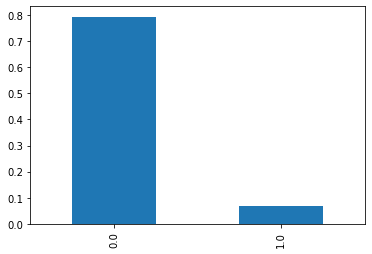

In [63]:
((df_slect['TARGET'].value_counts())/ (df_slect['TARGET'].shape[0])).plot.bar()

### Commentaire: 

Les données pour les différentes valeurs de **_TARGET_** sont très disportionnées. Nous par la suite aprés le traitement des valeurs manqunates, combler ce déséquilibre. 

### <font color="red" id="section_5_2"> 5.2. Distribution 

In [64]:
df_numeric = df_slect.select_dtypes(include =['float', 'int'])
df_numeric.shape

(356255, 23)

23it [01:45,  4.61s/it]


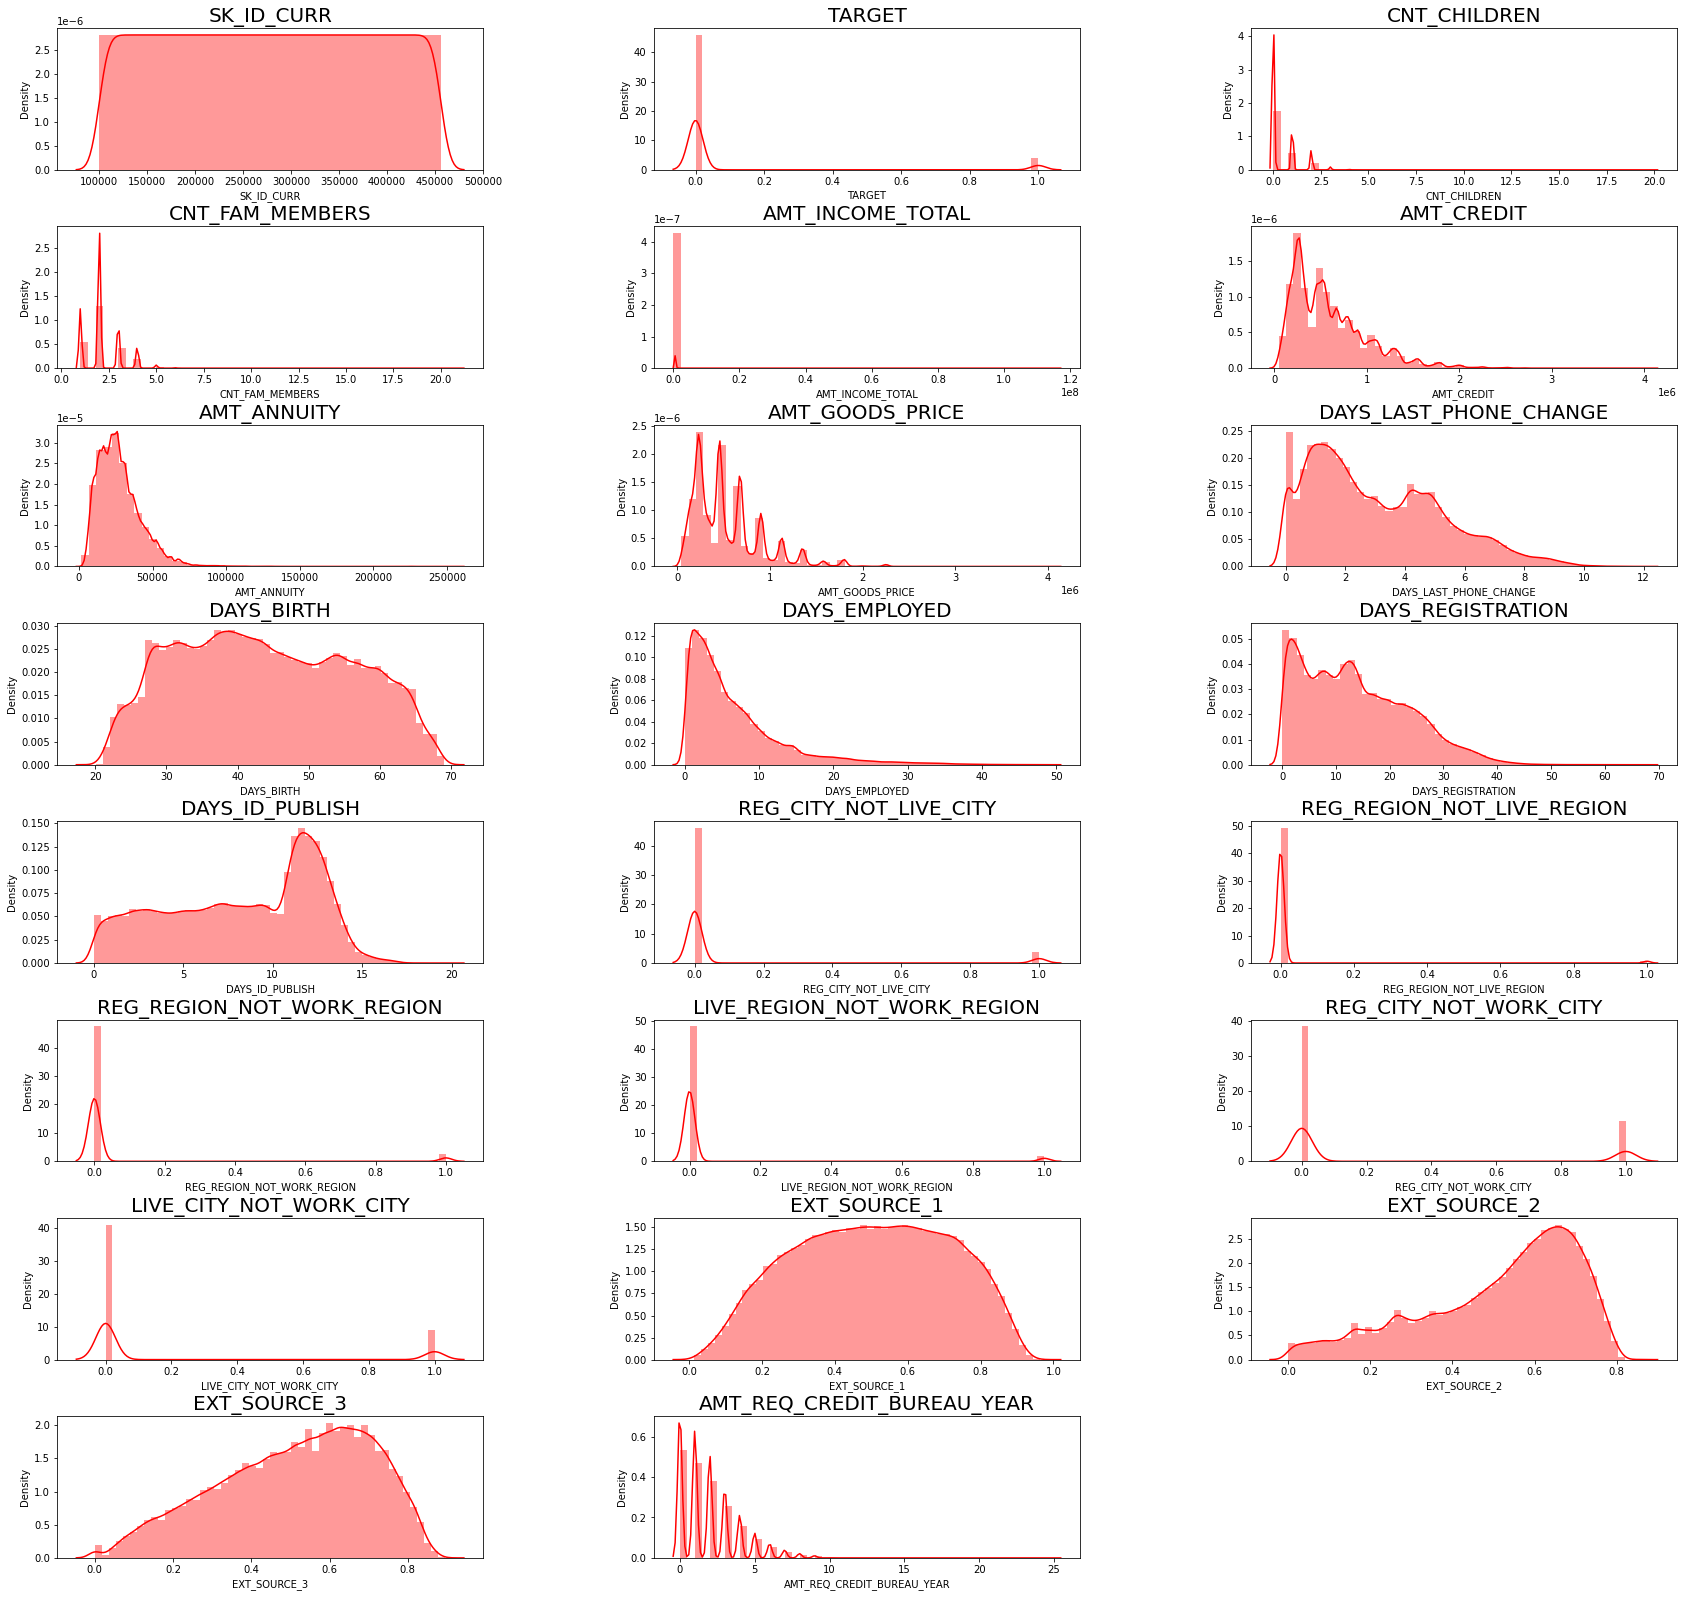

In [65]:
# Affichage des ditribution 
plt.figure(figsize=(25, 30))
for i, col in tqdm(enumerate(df_numeric)):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    sns.distplot(df_numeric[col], color = 'red')
    plt.title(col, fontsize =20)

**Commentaire**: 

Les distribution ne sont pas **normales** autrement dit la moyenne et la médiane ne sont pas égales. On remarque également  qu'il y'a une valeur anormale dans **AMT_INCOME_TOTAL**.

In [66]:
df_slect['AMT_INCOME_TOTAL'].describe()

count    3.562550e+05
mean     1.701161e+05
std      2.235068e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.530000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

**Constat**:

Le min = 25650 $ 


Le max = 117 000 000 $

Il faudrait remplacer cette valeur maximale par celle de la $3^{iéme}$ **quartile** ou la supprimer.

In [67]:
df_slect = df_slect[df_slect['AMT_INCOME_TOTAL']!=117000000]

### Vérification

In [68]:
df_numeric = df_slect.select_dtypes(include =['float', 'int'])

23it [02:10,  5.69s/it]


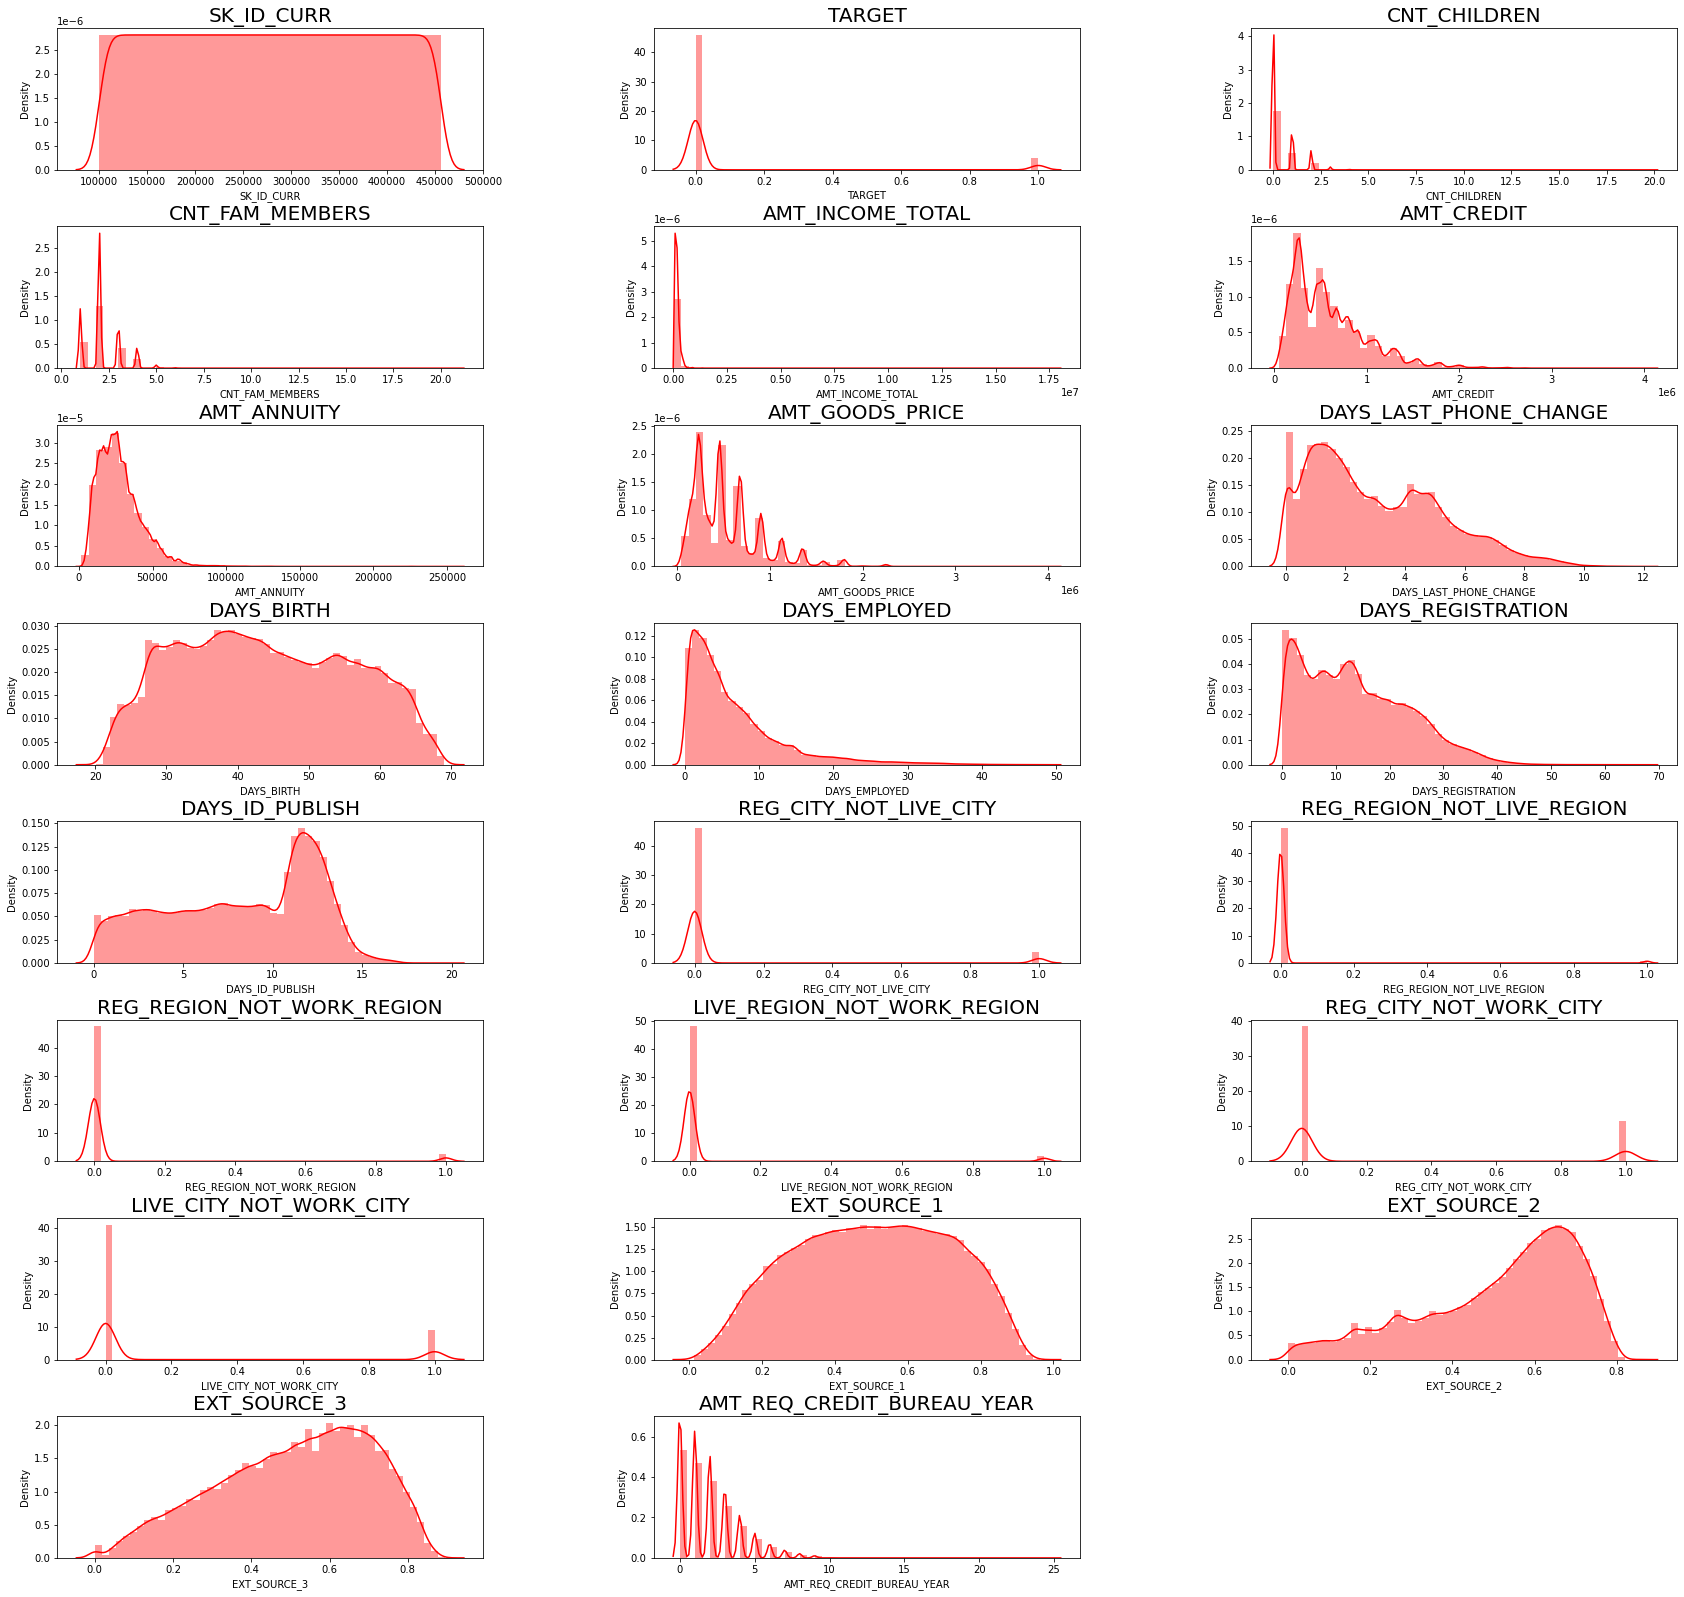

In [69]:
# Affichage des ditribution 
plt.figure(figsize=(25, 30))
for i, col in tqdm(enumerate(df_numeric)):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    sns.distplot(df_numeric[col], color = 'red')
    plt.title(col, fontsize =20)

### <font color="red" id="section_5_3"> 5.3. Valeurs uniques

In [70]:
## créer un dataframe avec des colonnes de type d'objet
unique_df = pd.DataFrame(df_slect.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','Nombre de  valeurs uniques']

### Détermination  de valeurs uniques

In [71]:
unique_df['Valeurs uniques'] = unique_df['Column'].apply(lambda x: df_slect[x].unique())
unique_df.sort_values(by='Nombre de  valeurs uniques')

,Column,Nombre de valeurs uniques,Valeurs uniques
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
1,CODE_GENDER,3,"[M, F, XNA]"
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
5,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
7,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."
4,NAME_INCOME_TYPE,8,"[Working, State servant, Commercial associate,..."


In [72]:
for column in tqdm(df_slect.select_dtypes('object').columns.to_list()):
    if df_slect[column].nunique()>5:
        print('Colonne {}, valeurs uniques :{}\n'.format(column, df_slect[column].unique()))

100%|██████████| 8/8 [00:00<00:00, 20.47it/s]

Colonne NAME_INCOME_TYPE, valeurs uniques :['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Colonne NAME_FAMILY_STATUS, valeurs uniques :['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Colonne NAME_HOUSING_TYPE, valeurs uniques :['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']



## Commentaire: 

On va supprimer le genre **XNA** dans la variable **CODE_GENDER**.

In [73]:
df_slect['CODE_GENDER'].value_counts()

F      235125
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

In [74]:
df_slect = df_slect[df_slect["CODE_GENDER"]!="XNA"]

## <font color="red" id="section_5_4"> 5.4 Traitement valeurs manquantes
Dans cette section, on va imputer des valeurs manquantes par la mediane de la variables selon le statut familial

In [75]:
df_slect.isna().sum().sort_values(ascending =False)

EXT_SOURCE_1                   193908
EXT_SOURCE_3                    69633
DAYS_EMPLOYED                   64648
TARGET                          48744
AMT_REQ_CREDIT_BUREAU_YEAR      47568
DAYS_LAST_PHONE_CHANGE          43473
EXT_SOURCE_2                      668
AMT_GOODS_PRICE                   278
DAYS_REGISTRATION                  93
AMT_ANNUITY                        36
DAYS_ID_PUBLISH                    21
CNT_FAM_MEMBERS                     2
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION          0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
REG_REGION_NOT_WORK_REGION          0
SK_ID_CURR                          0
DAYS_BIRTH                          0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_INCOME_TYPE                    0
AMT_CREDIT                          0
AMT_INCOME_TOTAL                    0
CNT_CHILDREN                        0
FLAG_OWN_REA

In [76]:
df_slect['NAME_FAMILY_STATUS'].value_counts()

Married                 228711
Single / not married     52480
Civil marriage           34035
Separated                22725
Widow                    18297
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [77]:
col_na = ["EXT_SOURCE_1", "EXT_SOURCE_3", 'DAYS_EMPLOYED',                           
'AMT_REQ_CREDIT_BUREAU_YEAR' , 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2',                    
'AMT_GOODS_PRICE', 'DAYS_REGISTRATION',  "AMT_ANNUITY",                   
"DAYS_ID_PUBLISH" , "CNT_FAM_MEMBERS"]

In [78]:
df_slect_na = df_slect.copy()

In [79]:
df_slect_na[col_na].isna().sum()

EXT_SOURCE_1                  193908
EXT_SOURCE_3                   69633
DAYS_EMPLOYED                  64648
AMT_REQ_CREDIT_BUREAU_YEAR     47568
DAYS_LAST_PHONE_CHANGE         43473
EXT_SOURCE_2                     668
AMT_GOODS_PRICE                  278
DAYS_REGISTRATION                 93
AMT_ANNUITY                       36
DAYS_ID_PUBLISH                   21
CNT_FAM_MEMBERS                    2
dtype: int64

In [80]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [81]:
imputer = IterativeImputer(random_state=42, min_value =0)
imputed = imputer.fit_transform(df_slect[col_na])

df_imputed_na= pd.DataFrame(imputed, columns=col_na).round( 0)

In [82]:
df_imputed_na.head()

,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
0,0.0,0.0,2.0,1.0,3.0,0.0,351000.0,10.0,24700.0,6.0,1.0
1,0.0,0.0,3.0,0.0,2.0,1.0,1129500.0,3.0,35698.0,1.0,2.0
2,0.0,1.0,1.0,0.0,2.0,1.0,135000.0,12.0,6750.0,7.0,1.0
3,1.0,1.0,8.0,2.0,2.0,1.0,297000.0,27.0,29686.0,7.0,2.0
4,1.0,1.0,8.0,0.0,3.0,0.0,513000.0,12.0,21866.0,9.0,1.0


In [83]:
df_imputed_na.shape

(356250, 11)

In [84]:
df_imputed_na.describe().T

,count,mean,std,min,25%,50%,75%,max
EXT_SOURCE_1,356250.0,0.530316,0.499081,0.0,0.0,1.0,1.0,1.0
EXT_SOURCE_3,356250.0,0.540606,0.498349,0.0,0.0,1.0,1.0,1.0
DAYS_EMPLOYED,356250.0,6.870793,5.900720,0.0,3.0,6.0,9.0,49.0
AMT_REQ_CREDIT_BUREAU_YEAR,356250.0,1.920432,1.737919,0.0,1.0,2.0,3.0,25.0
DAYS_LAST_PHONE_CHANGE,356250.0,3.026630,2.089861,0.0,1.0,3.0,4.0,12.0
EXT_SOURCE_2,356250.0,0.619119,0.485604,0.0,0.0,1.0,1.0,1.0
AMT_GOODS_PRICE,356250.0,527821.487133,366031.611974,40500.0,234000.0,450000.0,675000.0,4050000.0
DAYS_REGISTRATION,356250.0,13.646285,9.660477,0.0,5.0,12.0,20.0,68.0
AMT_ANNUITY,356250.0,27425.572735,14732.595096,1616.0,16731.0,25078.0,34960.0,258026.0
DAYS_ID_PUBLISH,356250.0,8.216988,4.170267,0.0,5.0,9.0,12.0,20.0


In [85]:
df_slect.drop(col_na, axis =1, inplace =  True)

In [86]:
df_slect = df_slect.merge(df_imputed_na, how='inner', left_index=True, right_index=True)

In [87]:
df_slect.shape

(356245, 31)

## Vérification

In [88]:
df_slect.isna().sum()

SK_ID_CURR                         0
TARGET                         48739
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
NAME_INCOME_TYPE                   0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
REG_CITY_NOT_LIVE_CITY             0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
EXT_SOURCE_1                       0
EXT_SOURCE_3                       0
DAYS_EMPLOYED                      0
AMT_REQ_CREDIT_BUREAU_YEAR         0
DAYS_LAST_PHONE_CHANGE             0
EXT_SOURCE_2                       0
AMT_GOODS_PRICE                    0
D

## <font color = 'red' > Etape 2: Encodage des catégorielles

**Pour les variables binaire**

Pour ces caractéristiques, nous allons coder par 0 ou 1. 

In [89]:
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df_slect[bin_feature], uniques = pd.factorize(df_slect[bin_feature])

In [90]:
df_slect.shape

(356245, 31)

In [91]:
df_slect.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
0,100002,1.0,Cash loans,0,0,0,0,202500.0,406597.5,Working,Single / not married,Secondary / secondary special,House / apartment,25.902806,0,0,0,0,0,0,0.0,0.0,2.0,1.0,3.0,0.0,351000.0,10.0,24700.0,6.0,1.0
1,100003,0.0,Cash loans,1,0,1,0,270000.0,1293502.5,State servant,Married,Higher education,House / apartment,45.900068,0,0,0,0,0,0,0.0,0.0,3.0,0.0,2.0,1.0,1129500.0,3.0,35698.0,1.0,2.0
2,100004,0.0,Revolving loans,0,1,0,0,67500.0,135000.0,Working,Single / not married,Secondary / secondary special,House / apartment,52.145106,0,0,0,0,0,0,0.0,1.0,1.0,0.0,2.0,1.0,135000.0,12.0,6750.0,7.0,1.0


**Pour les autres variables catégorielles**

Pour ces éléments, nous allons coder à haut avec **One hot Encoder**

In [92]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.select_dtypes('object').columns]
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [93]:
df_slect.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE'],
      dtype='object')

In [94]:
df_slect, cat_cols = one_hot_encoder(df_slect, nan_as_category = False)

In [95]:
df_slect.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,1.0,0,0,0,0,202500.0,406597.5,25.902806,0,0,0,0,0,0,0.0,0.0,2.0,1.0,3.0,0.0,351000.0,10.0,24700.0,6.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,45.900068,0,0,0,0,0,0,0.0,0.0,3.0,0.0,2.0,1.0,1129500.0,3.0,35698.0,1.0,2.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,100004,0.0,0,1,0,0,67500.0,135000.0,52.145106,0,0,0,0,0,0,0.0,1.0,1.0,0.0,2.0,1.0,135000.0,12.0,6750.0,7.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [96]:
df_slect.shape

(356245, 53)

In [97]:
cat_cols

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents']

## <font color = 'red' > Etape 3: Features transformation
Dans cette partie
* Nous transformerons les **variables référentes aux  temps en pourcentage**
    
* Nous créerons les revenues par  membre du foyer et les variables qui définissent les capacité d'un client à savoir les rapports:
    
    
    
* $\frac{Revenue \ Total}{Credit}$
    

    
* $\frac{Revenue \ Total}{Nombre\  de\  membre\  par\   famille}$
  
    
* $\frac{Revenue \ Total}{Rente}$
    
    
* $\frac{Rente}{Credit}$
 
    
* **DAYS_EMPLOYED_PERC** : le pourcentage de jours employés par rapport à l'âge des clients
    
    
* **INCOME_CREDIT_PERC** : le pourcentage du revenus par rapport au montant du crédit d'un client
    
    
* **ANNUITY_INCOME_PERC** : le pourcentage de revenus par rapport à l'annuité du prêt (rente) d'un client
    
    
* **PAYMENT_RATE** : Le taux de paiement
    

In [98]:
df_slect['DAYS_EMPLOYED_PERC'] = df_slect['DAYS_EMPLOYED'] / df_slect['DAYS_BIRTH']
df_slect['INCOME_CREDIT_PERC'] = df_slect['AMT_INCOME_TOTAL'] / df_slect['AMT_CREDIT']
df_slect['INCOME_PER_PERSON'] = df_slect['AMT_INCOME_TOTAL'] / df_slect['CNT_FAM_MEMBERS']
df_slect['ANNUITY_INCOME_PERC'] = df_slect['AMT_ANNUITY'] / df_slect['AMT_INCOME_TOTAL']
df_slect['PAYMENT_RATE'] = df_slect['AMT_ANNUITY'] / df_slect['AMT_CREDIT']

In [99]:
df_slect.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,202500.0,406597.5,25.902806,0,0,0,0,0,0,0.0,0.0,2.0,1.0,3.0,0.0,351000.0,10.0,24700.0,6.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.077212,0.498036,202500.0,0.121975,0.060748
1,100003,0.0,1,0,1,0,270000.0,1293502.5,45.900068,0,0,0,0,0,0,0.0,0.0,3.0,0.0,2.0,1.0,1129500.0,3.0,35698.0,1.0,2.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.065359,0.208736,135000.0,0.132215,0.027598
2,100004,0.0,0,1,0,0,67500.0,135000.0,52.145106,0,0,0,0,0,0,0.0,1.0,1.0,0.0,2.0,1.0,135000.0,12.0,6750.0,7.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.019177,0.500000,67500.0,0.100000,0.050000


In [100]:
df_slect.drop(['DAYS_EMPLOYED','DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','CNT_FAM_MEMBERS', 'AMT_ANNUITY'],axis =1,  inplace = True)

In [101]:
df_slect.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.0,351000.0,10.0,6.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.077212,0.498036,202500.0,0.121975,0.060748
1,100003,0.0,1,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,1.0,1129500.0,3.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.065359,0.208736,135000.0,0.132215,0.027598
2,100004,0.0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,2.0,1.0,135000.0,12.0,7.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.019177,0.500000,67500.0,0.100000,0.050000


In [102]:
df_slect.shape

(356245, 52)

In [103]:
df_slect.to_csv("app_test_encodede_feature_engen.csv", index = False)

 ## Commentaire:
 Puisque _TARGET_ sera notre variable à prédire autrement l'étiquette dans la partie modélisation, nous devons nous assurer qu'il ne contient pas de valeurs manquantes. 

In [104]:
df_slect = df_slect[df_slect['TARGET'].notnull()]

In [105]:
df_slect.head(3)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,AMT_GOODS_PRICE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,3.0,0.0,351000.0,10.0,6.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.077212,0.498036,202500.0,0.121975,0.060748
1,100003,0.0,1,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,1.0,1129500.0,3.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.065359,0.208736,135000.0,0.132215,0.027598
2,100004,0.0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,0.0,2.0,1.0,135000.0,12.0,7.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.019177,0.500000,67500.0,0.100000,0.050000


In [106]:
df_slect.shape

(307506, 52)

In [107]:
df_slect.isna().sum().sum()

0

## <font color="red" id="section_6"> 6. Breve analyse exploratoire
    
### <font color="red" id="section_6_1"> 6.1 Répartition par genre des clients
    
* **0**  définit les femmes

* **1** les hommes.

In [108]:
df_slect['CODE_GENDER'].value_counts()

1    202447
0    105059
Name: CODE_GENDER, dtype: int64

<AxesSubplot:>

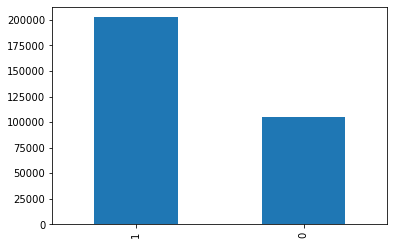

In [109]:
df_slect['CODE_GENDER'].value_counts().plot.bar()

### <font color="red" id="section_6_2"> 6.2 Répartition des revenus par personne en fontion du genre

In [110]:
df_slect['disct_incom'] = pd.qcut(df_slect['INCOME_PER_PERSON'], 5)

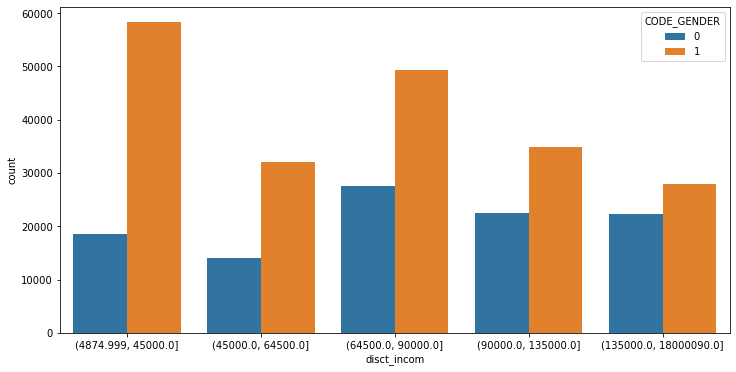

In [111]:
plt.figure(figsize =(12,6))
sns.countplot(data =df_slect, x =df_slect['disct_incom'], hue ="CODE_GENDER"  )
plt.show()

Ce graphique montre que pour chaque tranche de revenus, les hommes perçoivent plus que leurs homologues féminins.

### <font color="red" id="section_6_3"> 6.3 Répartition des clients susceptible d'être en faillite en fonction de leur situation familiale 

In [112]:
situ_fami = ["NAME_FAMILY_STATUS_Civil marriage","NAME_FAMILY_STATUS_Married","NAME_FAMILY_STATUS_Separated",
             "NAME_FAMILY_STATUS_Single / not married", "NAME_FAMILY_STATUS_Unknown", "NAME_FAMILY_STATUS_Widow"]

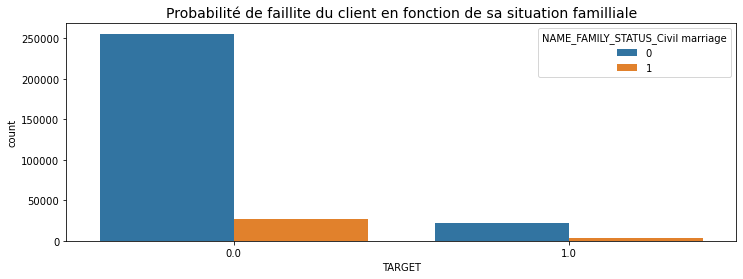

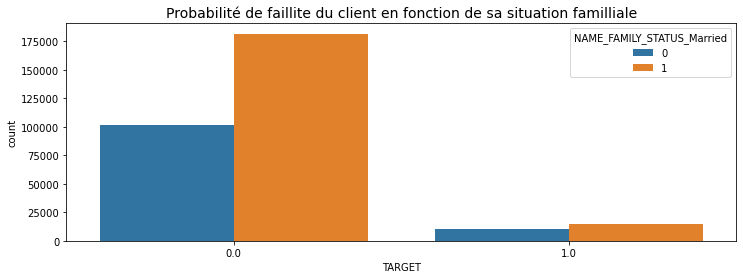

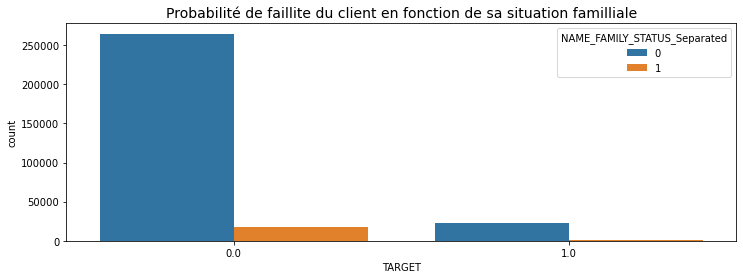

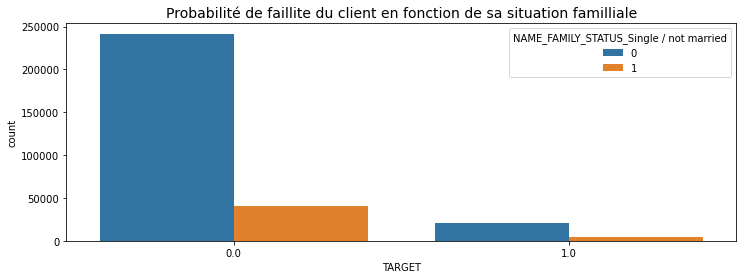

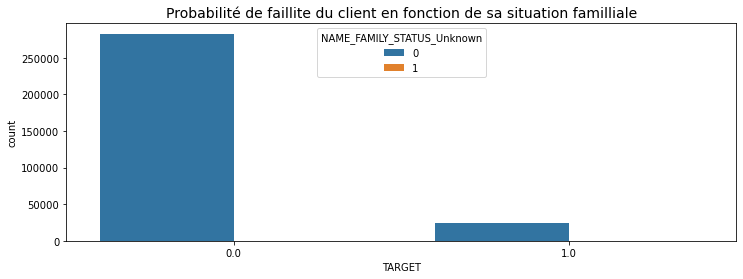

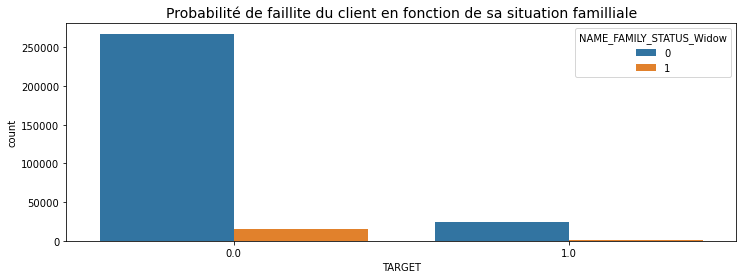

In [113]:
for col in  situ_fami:
    plt.figure(figsize =(12,4))
    sns.countplot(data =df_slect, x =df_slect['TARGET'], hue =col)
    plt.title('Probabilité de faillite du client en fonction de sa situation familliale', fontsize =14)
    plt.show()

## Commentaire :

* Pour les personnes **civilement mariées**, les **femmes** sont plus exposées à la **faillite** (ne pas pouvoir rembourser sa dette) que les hommes.


* Pour les personnes **mariées**, c'est plutôt que les hommes qui ont plus de chance de ne pas pouvoir honorer leurs dettes


* Ppur les **couples séparés**, les **hommes sont moins touchés par la faillite** que les femmes.


* Pour les **personnes non mariées/ seules, veuves**, là encore les **femmes** sont beaucoups **susceptibles de ne pouvoir rembourser les crédits** qui les engagent.

### <font color="red" id="section_6_4"> 6.4 Répartition des clients susceptible d'être en faillite en fonction  du nombre d'enfants

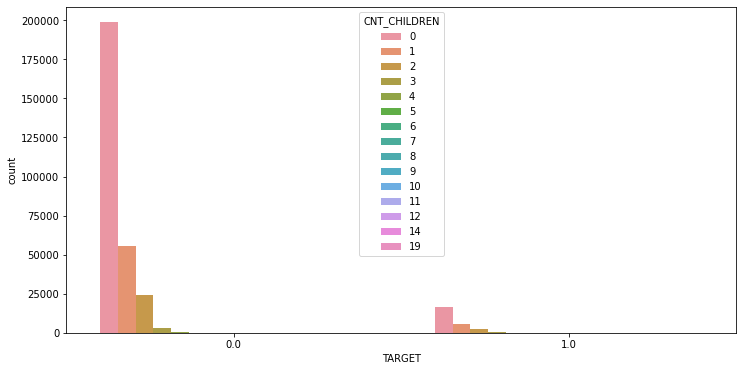

In [114]:
plt.figure(figsize =(12,6))
sns.countplot(data =df_slect, x =df_slect['TARGET'], hue ="CNT_CHILDREN" )
#sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")
plt.show()

## Commentaire:

Sans grande surprise, plus la **famille est grande**, plus la **probablité de faliite est importante**.

In [115]:
del df_slect['disct_incom']

## <font color="red" id="section_7"> 7. Laison entre les variables

<AxesSubplot:>

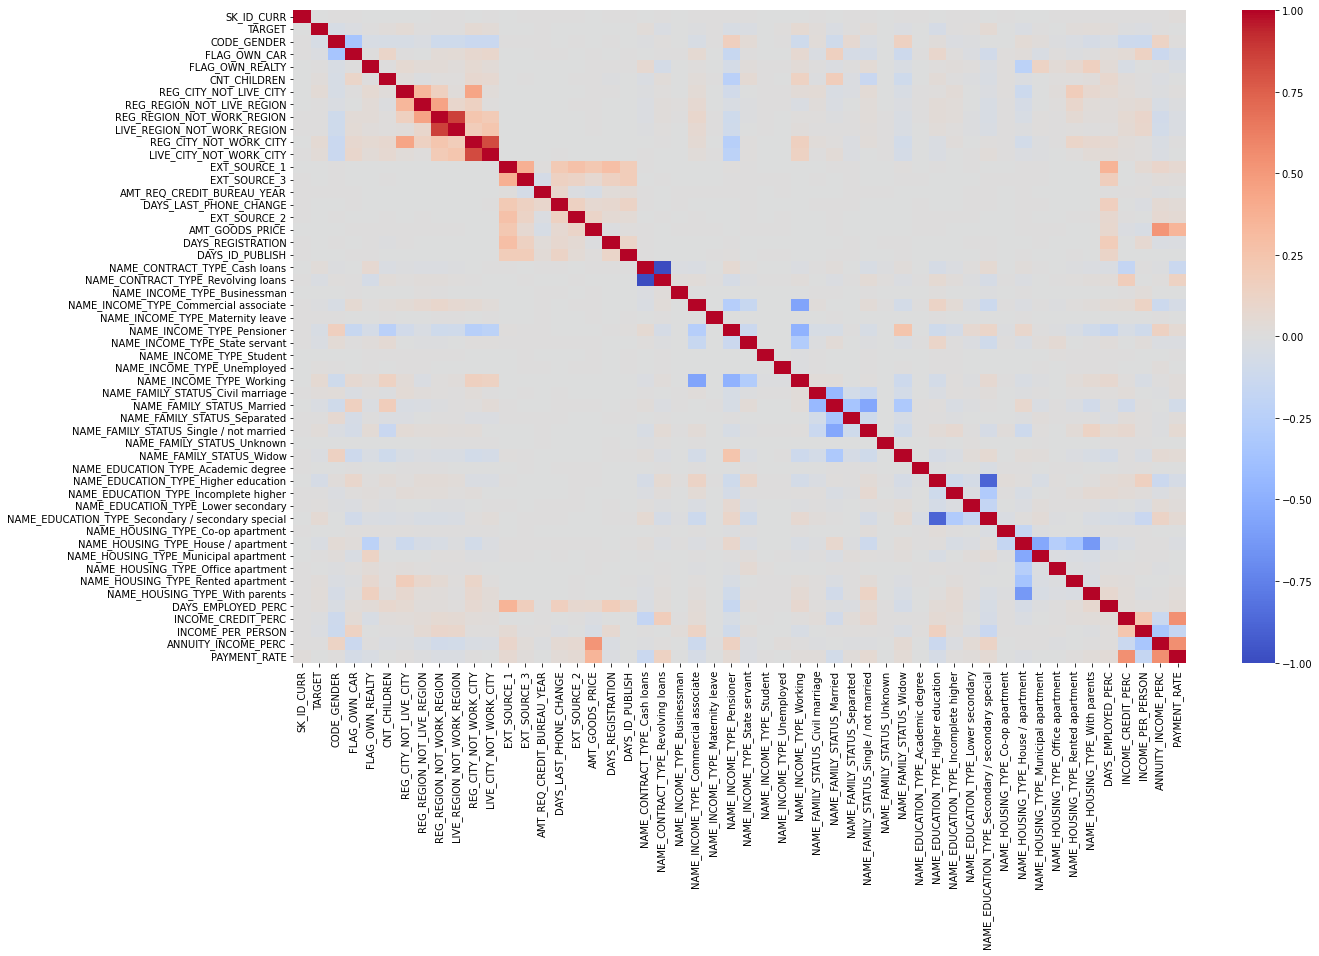

In [116]:
plt.figure(figsize =(20,12))
sns.heatmap(df_slect.corr(), cmap = 'coolwarm')

## Commentaire: 

Vu l'intensité des couleurs, on a aucune correlation forte entre les varaibles.

Notre dataset est maintenant prêt pour la modélisation.

### <font color="red" id="section_8"> 8. Enregistrement de fichier

In [117]:
df_slect.to_csv("data_model.csv", index = False)